# Regression Model
# Estimate House price

### Import data base

In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: openpyxl in c:\users\daniel.roman\appdata\local\programs\python\python311\lib\site-packages (3.1.5)




[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

In [3]:
df= pd.read_excel(r'C:\Users\daniel.roman\Documents\StatisticsII\propiedad raiz.xlsx')

In [4]:
# Cambiar los nombres de las columnas para facilitar el manejo
df.columns = ['Fecha', 'Area_m2', 'Habitaciones', 'Antiguedad', 'Estrato', 'Banos', 'Ubicacion', 'Precio']


In [5]:
# Eliminar la columna de fecha, ya que no es relevante para el análisis
df = df.drop(columns=['Fecha'])

In [6]:
df.head()

,Area_m2,Habitaciones,Antiguedad,Estrato,Banos,Ubicacion,Precio
0,120,3,8,4,2,1,420
1,85,2,5,5,1,2,360
2,150,4,15,3,3,3,510
3,90,3,7,4,2,4,390
4,200,5,20,6,3,2,820


### Clean and prepare dataset for the model

In [7]:
## missing values
df.isnull().sum()

Area_m2         0
Habitaciones    0
Antiguedad      0
Estrato         0
Banos           0
Ubicacion       0
Precio          0
dtype: int64

### EDA: Exploratory Data Analysis

In [8]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


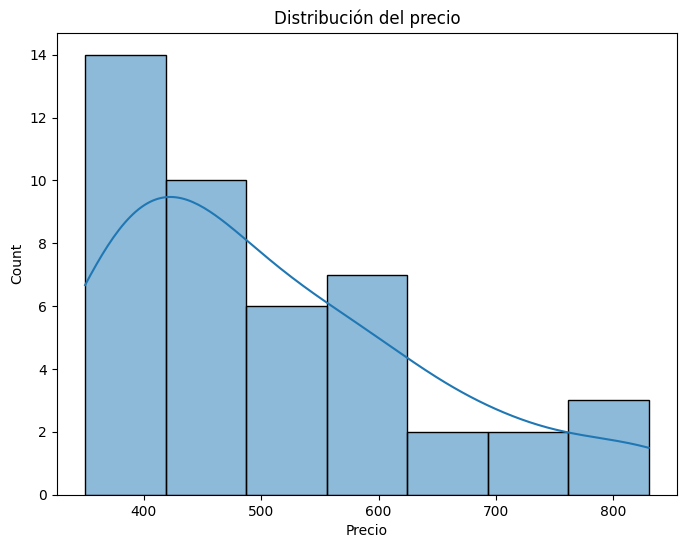

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

## price distribution

plt.figure(figsize=(8,6))
sns.histplot(df['Precio'], kde=True)
plt.title('Distribución del precio')
plt.show()

### Correlation Matrix

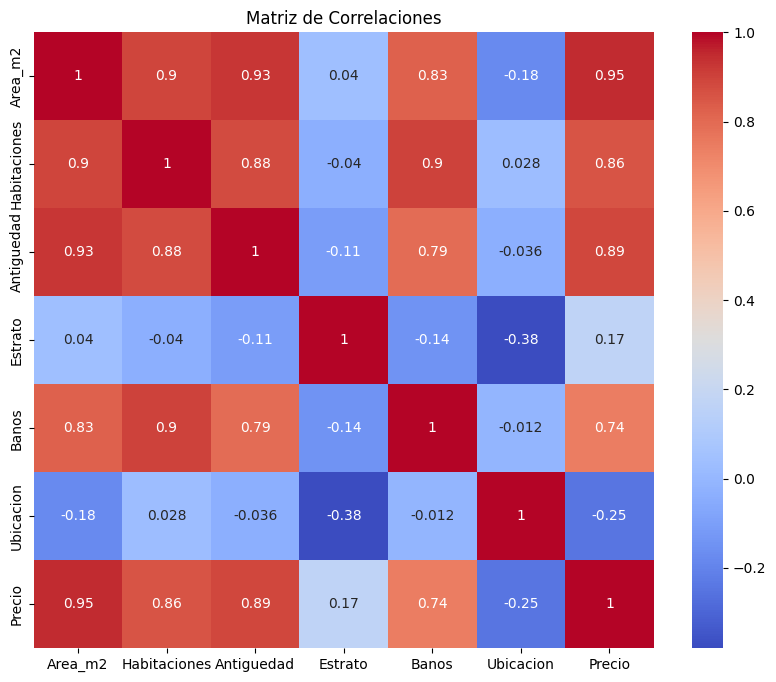

In [10]:
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlaciones')
plt.show()


### Normalization - standarization

In [12]:
from sklearn.preprocessing import StandardScaler

# Definir las columnas numéricas a estandarizar
numerical_cols = ['Area_m2', 'Habitaciones', 'Antiguedad', 'Estrato', 'Banos', 'Ubicacion', 'Precio']

# Escalador
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


### Train and Test split

In [11]:
from sklearn.model_selection import train_test_split

# Definir X (variables independientes) e y (variable objetivo)
X = df.drop(columns=['Precio'])
y = df['Precio']

# Dividir en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Regression model

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R2 Score: {r2}')


MSE: 952.952986623975
R2 Score: 0.9719556779841076


### P- values

In [13]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import statsmodels.api as sm

# Añadir una constante para statsmodels
X_train_sm = sm.add_constant(X_train)

# Ajustar el modelo de OLS
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Mostrar el resumen con los coeficientes y p-valores
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:                 Precio   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     39.09
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           2.40e-12
Time:                        14:38:31   Log-Likelihood:                -174.24
No. Observations:                  35   AIC:                             362.5
Df Residuals:                      28   BIC:                             373.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -41.0822     74.808     -0.549   

### Significant variables selection

In [15]:
# Seleccionar las variables con p-valores < 0.05
significant_vars = model_sm.pvalues[model_sm.pvalues < 0.05].index

# Remover la constante 'const' de las variables significativas si existe
significant_vars = significant_vars.drop('const', errors='ignore')

# Crear nuevos datasets solo con las variables significativas
X_train_significant = X_train[significant_vars]
X_test_significant = X_test[significant_vars]

# Entrenar de nuevo el modelo con las variables significativas
model_significant = LinearRegression()
model_significant.fit(X_train_significant, y_train)

# Realizar predicciones
y_pred_significant = model_significant.predict(X_test_significant)

# Evaluar el nuevo modelo
mse_significant = mean_squared_error(y_test, y_pred_significant)
r2_significant = r2_score(y_test, y_pred_significant)

print(f'MSE (modelo ajustado): {mse_significant}')
print(f'R2 Score (modelo ajustado): {r2_significant}')


MSE (modelo ajustado): 2303.893949121452
R2 Score (modelo ajustado): 0.932199022715144


### Get the predictions

In [16]:
# Crear un DataFrame con los resultados
df_results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_significant
})

# Guardar los resultados en un archivo CSV
df_results.to_csv(r'C:\Users\daniel.roman\Documents\StatisticsII\predictions_price_medellin.csv', index=False)


In [17]:
df_results.tail()

,Actual,Predicted
34,360,332.850790
40,590,611.144848
4,820,759.568345
12,520,574.038974
8,410,388.509602


In [18]:
df_results

,Actual,Predicted
37,440,388.509602
24,810,759.568345
25,400,351.403727
36,830,759.568345
34,360,332.850790
40,590,611.144848
4,820,759.568345
12,520,574.038974
8,410,388.509602


In [20]:
# Crear un DataFrame con los valores originales y las predicciones
df_predictions = pd.DataFrame({
    'Area_m2': X_test_significant['Area_m2'],
    # 'Habitaciones': X_test_significant['Habitaciones'],
    # 'Antiguedad': X_test_significant['Antiguedad'],
    # 'Estrato': X_test_significant['Estrato'],
    # 'Banos': X_test_significant['Banos'],
    # 'Ubicacion': X_test_significant['Ubicacion'],
    'Precio_Real': y_test,
    'Precio_Predicho': y_pred_significant
})

# Guardar el DataFrame con los datos originales y las predicciones
file_path_predictions = r'C:\Users\daniel.roman\Documents\StatisticsII\predictions_vs_reals_price_medellin.csv'
df_predictions.to_csv(file_path_predictions, index=False)

file_path_predictions


'C:\\Users\\daniel.roman\\Documents\\StatisticsII\\predictions_vs_reals_price_medellin.csv'

In [21]:
df_predictions

,Area_m2,Precio_Real,Precio_Predicho
37,100,440,388.509602
24,200,810,759.568345
25,90,400,351.403727
36,200,830,759.568345
34,85,360,332.850790
40,160,590,611.144848
4,200,820,759.568345
12,150,520,574.038974
8,100,410,388.509602
